In [27]:
%load_ext autoreload
%autoreload 2
import sys
# sys.path.append(r'E:/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
# sys.path.append('/Users/yanbin/Documents/Projects/AI-Middle-Project/')
# sys.path.append('/Users/yanbin/Documents/Projects/mylearn')

# sys.path.append('/home/wyf/0code/AI-Middle-Project/')
# sys.path.append('/home/wyf/0code/mylearn')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logger import get_logger
from neural_network import MLPClassifier
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.metrics.classification import precision_score
from pyml.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


mylogger = get_logger(__name__)
mylogger.debug('hello world')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[DEBUG] <ipython-input-27-4b77f8076594> <ipython-input-27-4b77f8076594> - <module> line 25 - 
hello world
 - (2018-10-21 03:50:13)



# 读取数据

In [2]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')

In [3]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [4]:
train_X_tfidf = np.load('../data/clean/trainX_tfidf-24000-62761.npy')
test_X_tfidf = np.load('../data/clean/testX_tfidf-6000-62761.npy')

In [11]:
train_X_onehot = np.load('../data/clean/trainX_onehot-24000-62761.npy')
test_X_onehot = np.load('../data/clean/testX_onthot-6000-62761.npy')

In [12]:
train_ori_Y = np.load('../data/clean/trainY_24000.npy')

# 使用one-hot进行交叉验证

In [21]:
ss = StandardScaler()
train_X_1 = ss.fit_transform(train_X_onehot)
test_X_1 = ss.transform(test_X_onehot)

In [28]:
mx = MinMaxScaler()
train_X_1 = mx.fit_transform(train_X_1)
test_X_1 = mx.fit_transform(test_X_1)

In [30]:
train_X_1 /= 2
test_X_1 /= 2

In [31]:
train_X = train_X_1.T
test_X = test_X_1.T
train_Y  = train_ori_Y.reshape((-1,1))
train_X.shape,train_Y.shape,test_X.shape

((62761, 24000), (24000, 1), (62761, 6000))

In [32]:
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)
train_Y = pd.DataFrame(train_Y)
train_X.shape,train_Y.shape,test_X.shape

((62761, 24000), (24000, 1), (62761, 6000))

In [33]:
# learning_rates = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01]

learning_rates = [1,0.5,0.3, 0.1]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, valid_indices in ms.split(train_X_1):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(4,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=1000, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.6926163460197787
 - (2018-10-21 03:51:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4764583333333333, training score 0.5151041666666667
 - (2018-10-21 03:51:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 5.672736221745447
 - (2018-10-21 03:51:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5072916666666667
 - (2018-10-21 03:51:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 5.860962082495021
 - (2018-10-21 03:51:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.49114583333333334
 - (2018-10-21 03:51:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 5.91

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5052083333333334
 - (2018-10-21 03:58:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 5.686993191480444
 - (2018-10-21 03:59:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.50625
 - (2018-10-21 03:59:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 5.710988949050251
 - (2018-10-21 03:59:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5041666666666667
 - (2018-10-21 03:59:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 5.81896964677135
 - (2018-10-21 03:59:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.52333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[550] loss 5.909641490523245
 - (2018-10-21 04:06:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4864583333333333
 - (2018-10-21 04:06:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[560] loss 5.791668631848851
 - (2018-10-21 04:06:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.496875
 - (2018-10-21 04:06:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[570] loss 5.823938942892888
 - (2018-10-21 04:07:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.49375
 - (2018-10-21 04:07:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 5.750051937409018
 - (

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5072916666666667
 - (2018-10-21 04:14:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[830] loss 5.7421617876992626
 - (2018-10-21 04:14:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5005208333333333
 - (2018-10-21 04:14:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[840] loss 5.9542342808231545
 - (2018-10-21 04:14:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4817708333333333
 - (2018-10-21 04:14:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 5.576825825956139
 - (2018-10-21 04:15:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 5.944112483459397
 - (2018-10-21 04:22:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.48072916666666665
 - (2018-10-21 04:22:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 5.640602346872993
 - (2018-10-21 04:22:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.5078125
 - (2018-10-21 04:22:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 5.93894813886327
 - (2018-10-21 04:22:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.484375
 - (2018-10-21 04:22:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 5.684385632656044
 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4791666666666667
 - (2018-10-21 04:29:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 5.740983534236178
 - (2018-10-21 04:30:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5015625
 - (2018-10-21 04:30:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 5.78867055976433
 - (2018-10-21 04:30:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4973958333333333
 - (2018-10-21 04:30:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 5.914619979102726
 - (2018-10-21 04:30:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.523

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 5.462596633840586
 - (2018-10-21 04:37:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5255208333333333
 - (2018-10-21 04:37:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[660] loss 5.794973885505318
 - (2018-10-21 04:37:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.496875
 - (2018-10-21 04:37:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[670] loss 5.799602052926614
 - (2018-10-21 04:38:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.49635416666666665
 - (2018-10-21 04:38:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[680] loss 5.77357777

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5005208333333333
 - (2018-10-21 04:45:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 5.881351709776076
 - (2018-10-21 04:45:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4890625
 - (2018-10-21 04:45:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[940] loss 5.902954631666209
 - (2018-10-21 04:45:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4875
 - (2018-10-21 04:45:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[950] loss 5.906162924268755
 - (2018-10-21 04:46:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.52333333333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 5.912509463451192
 - (2018-10-21 04:54:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.484375
 - (2018-10-21 04:54:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 5.96879809468457
 - (2018-10-21 04:54:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.4817708333333333
 - (2018-10-21 04:54:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 5.561709869377557
 - (2018-10-21 04:54:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.5166666666666667
 - (2018-10-21 04:54:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 5.5229906494

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5
 - (2018-10-21 05:02:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 5.802388818940667
 - (2018-10-21 05:03:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4921875
 - (2018-10-21 05:03:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 5.620097936613037
 - (2018-10-21 05:03:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.5119791666666667
 - (2018-10-21 05:03:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[500] loss 5.762775962427104
 - (2018-10-21 05:03:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667,

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.8680557554003855
 - (2018-10-21 05:11:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.509375
 - (2018-10-21 05:11:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[760] loss 5.497957426942171
 - (2018-10-21 05:12:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.5197916666666667
 - (2018-10-21 05:12:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[770] loss 5.8369663728432535
 - (2018-10-21 05:12:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.49322916666666666
 - (2018-10-21 05:12:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[780] loss 5.770978

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.49114583333333334
 - (2018-10-21 05:20:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 1.0128372229595668
 - (2018-10-21 05:20:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4859375
 - (2018-10-21 05:21:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.8613650378080462
 - (2018-10-21 05:21:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.46875
 - (2018-10-21 05:21:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 1.0870417953724916
 - (2018-10-21 05:21:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.523333333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 1.8256262005400847
 - (2018-10-21 05:29:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.4947916666666667
 - (2018-10-21 05:29:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 2.1223375231769968
 - (2018-10-21 05:29:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5161458333333333
 - (2018-10-21 05:30:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 2.0424688216906053
 - (2018-10-21 05:30:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5233333333333333, training score 0.5109375
 - (2018-10-21 05:30:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 2.01667

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.50625
 - (2018-10-21 05:38:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.9712694594251681
 - (2018-10-21 05:38:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.4766666666666667, training score 0.5
 - (2018-10-21 05:38:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[590] loss 4.128050663491011
 - (2018-10-21 05:38:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.555625, training score 0.5661458333333333
 - (2018-10-21 05:38:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[600] loss 3.9186285603063014
 - (2018-10-21 05:39:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5391666666666667, training 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 3.273362790478519
 - (2018-10-21 05:46:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.62125, training score 0.6177083333333333
 - (2018-10-21 05:46:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[860] loss 2.5525780638745266
 - (2018-10-21 05:46:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.62, training score 0.5921875
 - (2018-10-21 05:46:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[870] loss 1.9924169929501019
 - (2018-10-21 05:46:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.5972916666666667, training score 0.5791666666666667
 - (2018-10-21 05:46:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[880] loss 2.503287557090285
 - (2018-10-21 

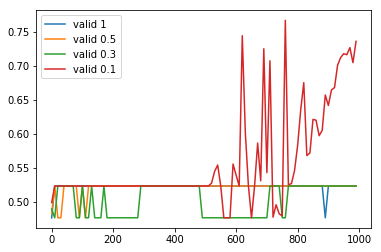

In [34]:
for i,model in enumerate(models):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
#     plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.legend()